<h2> Objective:- Task 3P: Working with numpy Matrices (Multidimensional Data) </h2>


<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>

Intro - Matrix is a special case of two dimensional array where each data element is of strictly same size. So every matrix is also a two dimensional array but not vice versa.

Matrices are very important data structures for many mathematical and scientific calculations. Here in this task I have used various numpy functions on numpy arrays. 

In [1]:
#Dependency

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
#Downloading csv and converting into numpy array
male_df = pd.read_csv("https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv", comment = "#")
female_df = pd.read_csv("https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv", comment ="#")
male_np = male_df.to_numpy()
female_np = female_df.to_numpy()

### 3.	On a single plot(use matplotlib.pyplot.subplot), draw two histograms: for female weights(top subfigure) and for male weights (bottom subfigure). Call matplotlib.pyplot.xlim to make the x- axis limits identical for both subfigures (work out the appropriate limits yourself).

(10.0, 200.0)

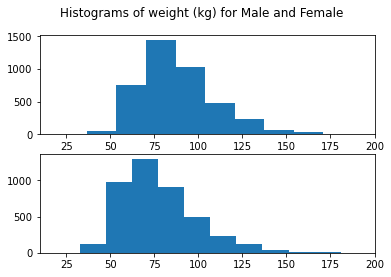

In [3]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Histograms of weight (kg) for Male and Female')
ax1.hist(male_np[:, 0])
ax1.set_xlim(10, 200)
ax2.hist(female_np[:, 0])
ax2.set_xlim(10, 200)

#### From the histogram, we can say that Male histogram is more close to normal distribution unlike female weights. Weight of male lies between 30 t0 170 whereas female weight lies between 30 to 150. Majority of male and female weight is between 50 to 100.

### 4. Call matplotlib.pyplot.boxplot to draw a box-and-whiskerplot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. Note that the boxplot function can be fed with a list of two vectors like [female_weights, male_weights]. In your own words, discuss the results. 

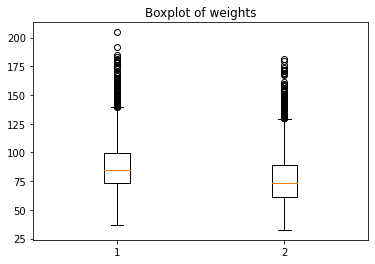

In [4]:
plt.boxplot([male_np[:, 0], female_np[:, 0]])
plt.title("Boxplot of weights")
plt.show()

#### Box plots are helpful because they offer a visual summary of the data, allowing researchers to recognise mean values, the dispersion of the data set, and indications of skewness rapidly. Box plots are helpful because they display a data set's dispersion. Median of Male weights is around 85 whereas median for female weights is around 75. There are plenty of outliers in both male weights and female weights.

### 5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth). 

In [5]:
#calculating Mean
print("Mean for male weight - ", round(np.mean(male_np[:, 0]), 2)) 
print("Median for male weight - ", round(np.median(male_np[:, 0]), 2))
print("Minimum for male weight - ", round(np.min(male_np[:, 0]), 2))
print("Maximum for male weight - ", round(np.max(male_np[:, 0]), 2))

#calculating Standard Deviation
print("Standard Deviation for male weight - ", round(np.std(male_np[:, 0]),2))

#Calculating Interquartile Range
q3, q1 = np.percentile(male_np[:, 0], [75, 25])
print("First quartile for male weight - ", round(q1, 2))
print("Third qartile Range for male weight - ", round(q3, 2))
print("Interquartile Range for male weight - ", round((q3 - q1), 2))

Mean for male weight -  88.36
Median for male weight -  85.0
Minimum for male weight -  36.8
Maximum for male weight -  204.6
Standard Deviation for male weight -  21.42
First quartile for male weight -  73.3
Third qartile Range for male weight -  99.8
Interquartile Range for male weight -  26.5


##### Average weight for male is 88.36 while median is 85. Maximum weight of male reaches as high as 204.6 and minimum weight reaches to 36.8. 

In [6]:
#calculating Mean
print("Mean for female weight - ", round(np.mean(female_np[:, 0]), 2)) 
print("Median for female weight - ", round(np.median(female_np[:, 0]), 2))
print("Minimum for female weight - ", round(np.min(female_np[:, 0]), 2))
print("Maximum for female weight - ", round(np.max(female_np[:, 0]), 2))

#calculating Standard Deviation
print("Standard Deviation for female weight - ", round(np.std(female_np[:, 0]),2))

#Calculating Interquartile Range
q3, q1 = np.percentile(female_np[:, 0], [75, 25])
print("First quartile for female_np weight - ", round(q1, 2))
print("Third qartile Range for female weight - ", round(q3, 2))
print("Interquartile Range for female weight - ", round((q3 - q1), 2))

Mean for female weight -  77.4
Median for female weight -  73.6
Minimum for female weight -  32.6
Maximum for female weight -  180.9
Standard Deviation for female weight -  21.54
First quartile for female_np weight -  61.6
Third qartile Range for female weight -  88.7
Interquartile Range for female weight -  27.1


##### Average weight for female is 77.4 while median is 73.6. Maximum weight of male reaches as high as 180.9 and minimum weight reaches to 32.6. 

(20.0, 190.0)

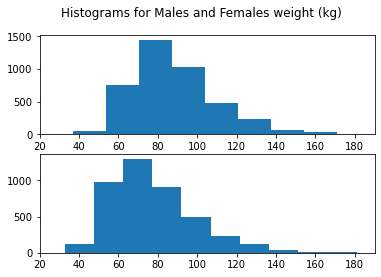

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Histograms for Males and Females weight (kg)')
ax1.hist(male_np[:, 0])
ax1.set_xlim(20, 190)
ax2.hist(female_np[:, 0])
ax2.set_xlim(20, 190)

### 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In [8]:
#Creating empty array
bmi_array = np.empty((len(female_np), 1), dtype = float)

#Calculating BMI
def calculateBMI(height, weight): 
    bmi = 0
    bmi = round(weight / (height / 100)**2, 2) 
    return bmi

for i in range(len(female_np)):
    bmi_array[i] = calculateBMI(female_np[i, 1], female_np[i, 0])

#Append calculated array
female_np = np.append(female_np, bmi_array, axis = 1)

#### 7. Create a new matrix z female being a version of the female dataset with all its columns standardised (by computing the z-scores of each column). 

In [9]:
#Defining function for calculating z-score
def standardise(x):
    return (x - np.mean(x)) / np.std(x)

zfemale_matrix = np.round(np.apply_along_axis(standardise, 0, female_np), 2)

#### 8. Draw a scatterplot matrix(pairplot) for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale). Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables. Interpret the obtained results. 



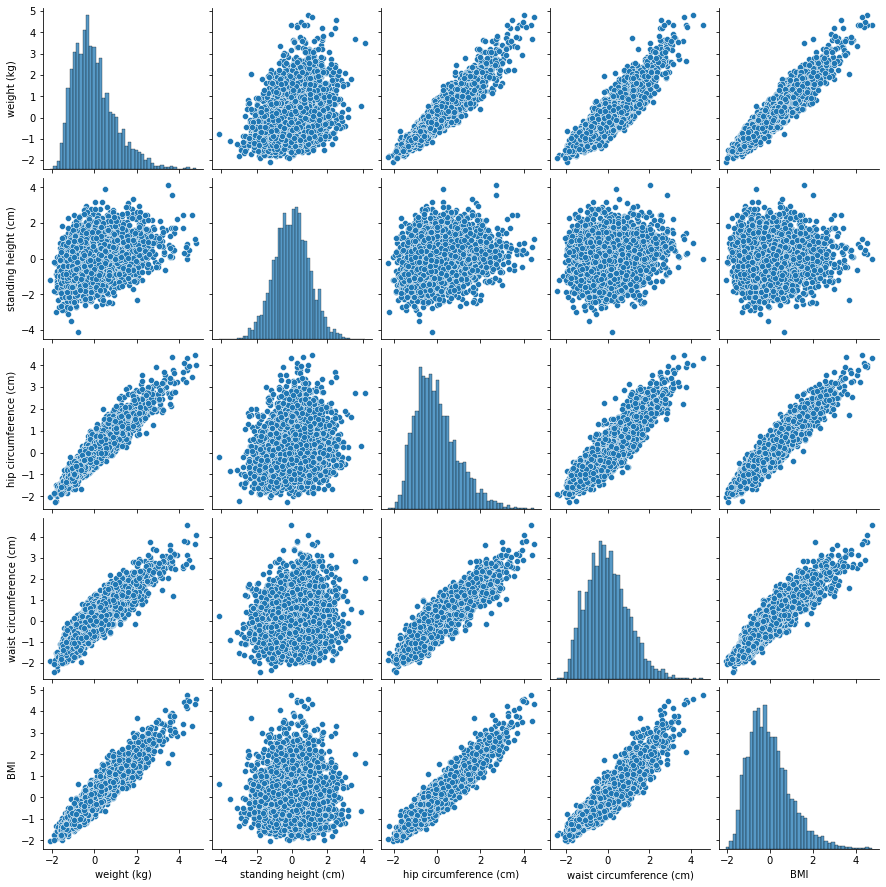

In [10]:
sns.pairplot(data = pd.DataFrame(
    zfemale_matrix[:, [0, 1, 5, 6, 7]],
    columns = [
        "weight (kg)", "standing height (cm)", "hip circumference (cm)",
        "waist circumference (cm)", "BMI"
    ]
))
plt.show()

In [11]:
weight = zfemale_matrix[:, 0]
height = zfemale_matrix[:, 1]
arm_length = zfemale_matrix[:, 2]
leg_lenth = zfemale_matrix[:, 3]
arm_circum = zfemale_matrix[:, 4]
hip_circum = zfemale_matrix[:, 5]
waist_circum = zfemale_matrix[:, 6]
BMI = zfemale_matrix[:, 7]

### Computing Pearson Correlation coefficient

In [12]:
#Pearson correlation between weight and other variables
print("Pearson Correlation Coefficient of between weight and height is:", round(scipy.stats.pearsonr(weight, height)[0], 2))
print("Pearson Correlation Coefficient of between weight and arm length is:", round(scipy.stats.pearsonr(weight, arm_length)[0], 2))
print("Pearson Correlation Coefficient of between weight and leg length is:", round(scipy.stats.pearsonr(weight, leg_lenth)[0], 2))
print("Pearson Correlation Coefficient of between weight and arm circumference is:", round(scipy.stats.pearsonr(weight, arm_circum)[0], 2))
print("Pearson Correlation Coefficient of between weight and hip circumference is:", round(scipy.stats.pearsonr(weight, hip_circum)[0], 2))
print("Pearson Correlation Coefficient of between weight and waist circumference is:", round(scipy.stats.pearsonr(weight, waist_circum)[0], 2))
print("Pearson Correlation Coefficient of between weight and BMI is:", round(scipy.stats.pearsonr(weight, BMI)[0], 2))

Pearson Correlation Coefficient of between weight and height is: 0.35
Pearson Correlation Coefficient of between weight and arm length is: 0.55
Pearson Correlation Coefficient of between weight and leg length is: 0.19
Pearson Correlation Coefficient of between weight and arm circumference is: 0.91
Pearson Correlation Coefficient of between weight and hip circumference is: 0.95
Pearson Correlation Coefficient of between weight and waist circumference is: 0.9
Pearson Correlation Coefficient of between weight and BMI is: 0.95


In [13]:
#Pearson correlation between height and other variables
print("Pearson Correlation Coefficient of between height and arm length is:", round(scipy.stats.pearsonr(height, arm_length)[0], 2))
print("Pearson Correlation Coefficient of between height and leg length is:", round(scipy.stats.pearsonr(height, leg_lenth)[0], 2))
print("Pearson Correlation Coefficient of between height and arm circumference is:", round(scipy.stats.pearsonr(height, arm_circum)[0], 2))
print("Pearson Correlation Coefficient of between height and hip circumference is:", round(scipy.stats.pearsonr(height, hip_circum)[0], 2))
print("Pearson Correlation Coefficient of between height and waist circumference is:", round(scipy.stats.pearsonr(height, waist_circum)[0], 2))
print("Pearson Correlation Coefficient of between height and BMI is:", round(scipy.stats.pearsonr(height, BMI)[0], 2))

Pearson Correlation Coefficient of between height and arm length is: 0.67
Pearson Correlation Coefficient of between height and leg length is: 0.66
Pearson Correlation Coefficient of between height and arm circumference is: 0.15
Pearson Correlation Coefficient of between height and hip circumference is: 0.2
Pearson Correlation Coefficient of between height and waist circumference is: 0.13
Pearson Correlation Coefficient of between height and BMI is: 0.03


In [14]:
#Pearson correlation between arm length and other variables
print("Pearson Correlation Coefficient of between arm length and leg length is:", round(scipy.stats.pearsonr(arm_length, leg_lenth)[0], 2))
print("Pearson Correlation Coefficient of between arm length and arm circumference is:", round(scipy.stats.pearsonr(arm_length, arm_circum)[0], 2))
print("Pearson Correlation Coefficient of between arm length and hip circumference is:", round(scipy.stats.pearsonr(arm_length, hip_circum)[0], 2))
print("Pearson Correlation Coefficient of between arm length and waist circumference is:", round(scipy.stats.pearsonr(arm_length, waist_circum)[0], 2))
print("Pearson Correlation Coefficient of between arm length and BMI is:", round(scipy.stats.pearsonr(arm_length, BMI)[0], 2))

Pearson Correlation Coefficient of between arm length and leg length is: 0.48
Pearson Correlation Coefficient of between arm length and arm circumference is: 0.45
Pearson Correlation Coefficient of between arm length and hip circumference is: 0.46
Pearson Correlation Coefficient of between arm length and waist circumference is: 0.43
Pearson Correlation Coefficient of between arm length and BMI is: 0.36


In [15]:
#Pearson correlation between leg length and other variables
print("Pearson Correlation Coefficient of between leg length and arm circumference is:", round(scipy.stats.pearsonr(leg_lenth, arm_circum)[0], 2))
print("Pearson Correlation Coefficient of between leg length and hip circumference is:", round(scipy.stats.pearsonr(leg_lenth, hip_circum)[0], 2))
print("Pearson Correlation Coefficient of between leg length and waist circumference is:", round(scipy.stats.pearsonr(leg_lenth, waist_circum)[0], 2))
print("Pearson Correlation Coefficient of between leg length and BMI is:", round(scipy.stats.pearsonr(leg_lenth, BMI)[0], 2))

Pearson Correlation Coefficient of between leg length and arm circumference is: 0.08
Pearson Correlation Coefficient of between leg length and hip circumference is: 0.1
Pearson Correlation Coefficient of between leg length and waist circumference is: -0.03
Pearson Correlation Coefficient of between leg length and BMI is: -0.01


In [16]:
#Pearson correlation between arm circumference and other variables
print("Pearson Correlation Coefficient of between arm circumference and hip circumference is:", round(scipy.stats.pearsonr(arm_circum, hip_circum)[0], 2))
print("Pearson Correlation Coefficient of between arm circumference and waist circumference is:", round(scipy.stats.pearsonr(arm_circum, waist_circum)[0], 2))
print("Pearson Correlation Coefficient of between arm circumference and BMI is:", round(scipy.stats.pearsonr(arm_circum, BMI)[0], 2))

Pearson Correlation Coefficient of between arm circumference and hip circumference is: 0.87
Pearson Correlation Coefficient of between arm circumference and waist circumference is: 0.85
Pearson Correlation Coefficient of between arm circumference and BMI is: 0.92


In [17]:
#Pearson correlation between hip circumference and other variables
print("Pearson Correlation Coefficient of between hip circumference and waist circumference is:", round(scipy.stats.pearsonr(hip_circum, waist_circum)[0], 2))
print("Pearson Correlation Coefficient of between hip circumference and BMI is:", round(scipy.stats.pearsonr(hip_circum, BMI)[0], 2))

#Pearson correlation between waist circumference and other variables
print("Pearson Correlation Coefficient of between waist circumference and BMI is:", round(scipy.stats.pearsonr(waist_circum, BMI)[0], 2))

Pearson Correlation Coefficient of between hip circumference and waist circumference is: 0.9
Pearson Correlation Coefficient of between hip circumference and BMI is: 0.94
Pearson Correlation Coefficient of between waist circumference and BMI is: 0.92


### Computing Spearman Correlation coefficient

In [18]:
#Spearman correlation between weight and other variables
print("Spearman Correlation Coefficient of between weight and height is:", round(scipy.stats.spearmanr(weight, height)[0], 2))
print("Spearman Correlation Coefficient of between weight and arm length is:", round(scipy.stats.spearmanr(weight, arm_length)[0], 2))
print("Spearman Correlation Coefficient of between weight and leg length is:", round(scipy.stats.spearmanr(weight, leg_lenth)[0], 2))
print("Spearman Correlation Coefficient of between weight and arm circumference is:", round(scipy.stats.spearmanr(weight, arm_circum)[0], 2))
print("Spearman Correlation Coefficient of between weight and hip circumference is:", round(scipy.stats.spearmanr(weight, hip_circum)[0], 2))
print("Spearman Correlation Coefficient of between weight and waist circumference is:", round(scipy.stats.spearmanr(weight, waist_circum)[0], 2))
print("Spearman Correlation Coefficient of between weight and BMI is:", round(scipy.stats.spearmanr(weight, BMI)[0], 2))

Spearman Correlation Coefficient of between weight and height is: 0.34
Spearman Correlation Coefficient of between weight and arm length is: 0.54
Spearman Correlation Coefficient of between weight and leg length is: 0.2
Spearman Correlation Coefficient of between weight and arm circumference is: 0.91
Spearman Correlation Coefficient of between weight and hip circumference is: 0.95
Spearman Correlation Coefficient of between weight and waist circumference is: 0.9
Spearman Correlation Coefficient of between weight and BMI is: 0.94


In [19]:
#Spearman correlation between height and other variables
print("Spearman Correlation Coefficient of between height and arm length is:", round(scipy.stats.spearmanr(height, arm_length)[0], 2))
print("Spearman Correlation Coefficient of between height and leg length is:", round(scipy.stats.spearmanr(height, leg_lenth)[0], 2))
print("Spearman Correlation Coefficient of between height and arm circumference is:", round(scipy.stats.spearmanr(height, arm_circum)[0], 2))
print("Spearman Correlation Coefficient of between height and hip circumference is:", round(scipy.stats.spearmanr(height, hip_circum)[0], 2))
print("Spearman Correlation Coefficient of between height and waist circumference is:", round(scipy.stats.spearmanr(height, waist_circum)[0], 2))
print("Spearman Correlation Coefficient of between height and BMI is:", round(scipy.stats.spearmanr(height, BMI)[0], 2))

Spearman Correlation Coefficient of between height and arm length is: 0.67
Spearman Correlation Coefficient of between height and leg length is: 0.65
Spearman Correlation Coefficient of between height and arm circumference is: 0.14
Spearman Correlation Coefficient of between height and hip circumference is: 0.21
Spearman Correlation Coefficient of between height and waist circumference is: 0.11
Spearman Correlation Coefficient of between height and BMI is: 0.02


In [20]:
#Spearman correlation between arm length and other variables
print("Spearman Correlation Coefficient of between arm length and leg length is:", round(scipy.stats.spearmanr(arm_length, leg_lenth)[0], 2))
print("Spearman Correlation Coefficient of between arm length and arm circumference is:", round(scipy.stats.spearmanr(arm_length, arm_circum)[0], 2))
print("Spearman Correlation Coefficient of between arm length and hip circumference is:", round(scipy.stats.spearmanr(arm_length, hip_circum)[0], 2))
print("Spearman Correlation Coefficient of between arm length and waist circumference is:", round(scipy.stats.spearmanr(arm_length, waist_circum)[0], 2))
print("Spearman Correlation Coefficient of between arm length and BMI is:", round(scipy.stats.spearmanr(arm_length, BMI)[0], 2))

Spearman Correlation Coefficient of between arm length and leg length is: 0.46
Spearman Correlation Coefficient of between arm length and arm circumference is: 0.42
Spearman Correlation Coefficient of between arm length and hip circumference is: 0.45
Spearman Correlation Coefficient of between arm length and waist circumference is: 0.4
Spearman Correlation Coefficient of between arm length and BMI is: 0.34


In [21]:
#Spearman correlation between leg length and other variables
print("Spearman Correlation Coefficient of between leg length and arm circumference is:", round(scipy.stats.spearmanr(leg_lenth, arm_circum)[0], 2))
print("Spearman Correlation Coefficient of between leg length and hip circumference is:", round(scipy.stats.spearmanr(leg_lenth, hip_circum)[0], 2))
print("Spearman Correlation Coefficient of between leg length and waist circumference is:", round(scipy.stats.spearmanr(leg_lenth, waist_circum)[0], 2))
print("Spearman Correlation Coefficient of between leg length and BMI is:", round(scipy.stats.spearmanr(leg_lenth, BMI)[0], 2))

Spearman Correlation Coefficient of between leg length and arm circumference is: 0.08
Spearman Correlation Coefficient of between leg length and hip circumference is: 0.12
Spearman Correlation Coefficient of between leg length and waist circumference is: -0.04
Spearman Correlation Coefficient of between leg length and BMI is: -0.02


In [22]:
#Spearman correlation between arm circumference and other variables
print("Spearman Correlation Coefficient of between arm circumference and hip circumference is:", round(scipy.stats.spearmanr(arm_circum, hip_circum)[0], 2))
print("Spearman Correlation Coefficient of between arm circumference and waist circumference is:", round(scipy.stats.spearmanr(arm_circum, waist_circum)[0], 2))
print("Spearman Correlation Coefficient of between arm circumference and BMI is:", round(scipy.stats.spearmanr(arm_circum, BMI)[0], 2))

Spearman Correlation Coefficient of between arm circumference and hip circumference is: 0.87
Spearman Correlation Coefficient of between arm circumference and waist circumference is: 0.84
Spearman Correlation Coefficient of between arm circumference and BMI is: 0.92


In [23]:
#Spearman correlation between hip circumference and other variables
print("Spearman Correlation Coefficient of between hip circumference and waist circumference is:", round(scipy.stats.spearmanr(hip_circum, waist_circum)[0], 2))
print("Spearman Correlation Coefficient of between hip circumference and BMI is:", round(scipy.stats.spearmanr(hip_circum, BMI)[0], 2))

#Spearman correlation between waist circumference and other variables
print("Spearman Correlation Coefficient of between waist circumference and BMI is:", round(scipy.stats.spearmanr(waist_circum, BMI)[0], 2))

Spearman Correlation Coefficient of between hip circumference and waist circumference is: 0.89
Spearman Correlation Coefficient of between hip circumference and BMI is: 0.93
Spearman Correlation Coefficient of between waist circumference and BMI is: 0.92


## Task 2

### Task 2.1 Compute the waist circumference to height ratio and the waist cir- cumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

In [24]:
#Creating empty array
waist_ratio_array = np.empty((len(male_np), 1), dtype = float)
height_ratio_array = np.empty((len(male_np), 1), dtype = float)

#Calculating ratio
for i in range(len(male_np)):
    waist_ratio_array[i] = np.round((male_np[i, 6] / male_np[i, 1]), 2) 
    height_ratio_array[i] = np.round((male_np[i, 6] / male_np[i, 5]), 2)

#Appending into an array
male_np = np.append(male_np, waist_ratio_array, axis = 1)
male_np = np.append(male_np, height_ratio_array, axis = 1)

In [25]:
#Creating empty array
waist_ratio_array = np.empty((len(female_np), 1), dtype = float)
height_ratio_array = np.empty((len(female_np), 1), dtype = float)

#Calculating ratio
for i in range(len(female_np)):
    waist_ratio_array[i] = np.round((female_np[i, 6] / female_np[i, 1]), 2) 
    height_ratio_array[i] = np.round((female_np[i, 6] / female_np[i, 5]), 2)

#Appending into an array
female_np = np.append(female_np, waist_ratio_array, axis = 1)
female_np = np.append(female_np, height_ratio_array, axis = 1)

### Task 2.2 Draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waist-to-height ratio and the waist-to-hip ratio of both male and female participants. Explain what you see.

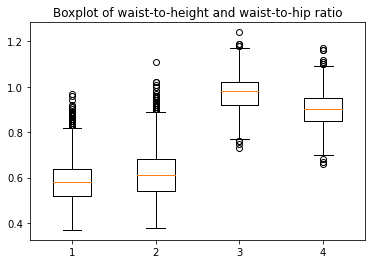

In [26]:
plt.boxplot([male_np[:, 7], female_np[:, 8], male_np[:, 8], female_np[:, 9]])
plt.title("Boxplot of waist-to-height and waist-to-hip ratio")
plt.show()

-> Median of waist-to height ratio for male and female is almost same accounting to 0.6 while median for waist-hip ratio for male is around 1 and for female it is 0.9

-> There are plenty of outliers in waist-height ratio for both male and female whereas there are pretty less outliers in waist-hip ratio.

### Task 2.3 In your own words, list some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.

-> Body mass index also known as BMI, is a convenient  formula to measure obesity based on height & weight, which doesn’t requires equipment.

    

    
<b> ** Advantages of BMI ** </b>


-> As stated, BMI helps measure the obesity rate in people. Observing the changes in BMI values helps doctors evaluate the obesity levels in people over time.
   
<n>

<n> -> It helps researchers determine the pattern of diet that results in obesity in a large group of people.

    
<n> -> This formula is not prohibitively expensive and It is convenient for using among large group of people.

    
    
<b> ** Disadvantages of BMI ** </b>

<n> ->BMI doesn't account for whether your weight is coming from lean tissue or fat because it just compares your weight to your height thus leading to brief idea which is not accurate.

<n> ->BMI can overstate the danger for persons who are strong and healthy as it can’t distinguish between subcutaneous or visceral fat.


<b> ** Advantages of waist to height ratio:- ** </b>

<n> -> Waist to height ratio is much better predictor than BMI for cardio-vascular diseases such as heart attack, stroke, etc.
<n> -> The use of the waist-to-height ratio (WHtR) addresses a current dilemma of how best to identify ‘early health risk’ with a very simple, low cost, anthropometric measure.
<n> ->Allows more accurate measurement of visceral fat ( Stored within abdominal cavity) which helps in detecting diseases.

<b> ** Disadvantages of waist to height ratio:- ** </b>

<n> -> WHR is limited to measure for adults & not for children as their height tends to increase rapidly.
<n> -> WHR can be measured inaccurately, it should not be relied on as a sole measure of obesity or health risk as chances of measuring it accurately from waist are low.

<b> ** Advantages of waist to hip ratio:- ** </b>
<n> -> WHR is an easy, inexpensive, and accurate way to see the proportion of your body fat. 
<n> -> One can obtain a better idea of abdominal obesity by comparing the waist and hip circumferences.
<n> -> Studies have indicated WHR to be a strong predictor of  diseases such as heart attack, diabetes, smoking, cholesterol, diet, activity, and hypertension.

<b> ** Disadvantages of waist to height ratio:- ** </b>

<n> -> Since it must take two distinct measurements to check WHR, errors are simple to make. Additionally, it may be challenging to measure hips accurately.
<n> -> It limits as a tool because it can indicate high range for people having more muscle in hip area due to exercise. 
<n> -> It’s usage is not accurate for children & not accurate for people who are shorter than 5 feet tall and people who have a BMI of 35 or higher.
